**Data Fusion for Cyber and Physical sensors** 
The architecture of data fusion differ based on the domain from which features are constructed. 
In this fusion, tutorial we will  consider the three main task:
1. Data collection from multiple sensor: packetbeat, packet capture, snort and AO,BO,BI and AI in the DNP3 packets.

2. Data processing from raw packets:
    Build cyber and physical data frame separately.
    In the Cyber data frame store features such as src IP, dest IP, src mac, dest mac, frame lenght, ip payload length, src and destination port, etc. In the physical data frame we store the DNP3 link layer information ( src and dest DNP3 entity by the ID). Extract each application payload based on the function code. In current work, extraction has been done for function code: 1(READ), 5(DIRECT OPERATE), 20 (ENABLE spontaneous message), 21(Disable spontaneous message), 129 (DNP3 RESPONSE),etc.
    


**Step 1**: Fusion of Raw Cyber and Physical Data from raw packets called pcaps

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/Shareddrives/GridSecCon_Public/Tutorial2_Cyber_Physical_Data_Fusion')

In [4]:
!pip install pyshark idstools

     |████████████████████████████████| 62 kB 1.1 MB/s 
  Created wheel for idstools: filename=idstools-0.6.4-py3-none-any.whl size=84512 sha256=95ee8dfdacfaf13108414fa905df66945421a32fa74adae58f5e0cda0ca7b4df
  Stored in directory: /root/.cache/pip/wheels/cd/c5/ba/8c8227135843da148fa6764ef5645cec80fd27aaa3fa749fc7
Successfully built idstools


In [5]:
# Create data fusion instance
from DataFusion import DataFusion

fusion = DataFusion()


**Step 2**: In wireshark, the packet dissectors are used to generate the json files. So here we will use the json output from wireshark to use as the source and load the json

In [6]:
%cd /content/drive/Shareddrives/GridSecCon_Public/Tutorial2_Cyber_Physical_Data_Fusion

/content/drive/Shareddrives/GridSecCon_Public/Tutorial2_Cyber_Physical_Data_Fusion


In [7]:
# load the JSON
fusion.load_json('BackUpData/feb19_dnp3_os_sample2.json')

**Step 3**: Extract the cyber features from the Raw Packet JSON. Currently in this version, we have only considered the ['frame.len' , 'frame.protocols' , 'eth.src' , 'eth.dst' , 'ip.src' , 'ip.dst' , 'ip.len' , 'ip.flags' , 'tcp.srcport' , 'tcp.dstport' , 'tcp.len' , 'tcp.flags']

In [ ]:
# extract the cyber data
fusion.extract_cyber_data()

,Time,frame.len,frame.protocols,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.flags,tcp.srcport,tcp.dstport,tcp.len,tcp.flags
0,1582145323.878934000,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018
1,1582145323.885065000,71,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,57,0x00004000,20000,36469,17,0x00000018
2,1582145323.887011000,81,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,67,0x00004000,36469,20000,27,0x00000018
3,1582145323.888941000,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018
4,1582145323.891181000,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,1582150544.432912000,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:23,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018
600,1582150545.479105000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,1582150550.689175000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,1582150551.699341000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Step 4**: Now we will merge the cyber and physical from multiple location. In data fusion there can be multiple sensors that can be placed in different locations. FOr example, in our case we have considered pcaps from different location such as the VM where the Outstation is running and also from the routers in the CORE as well as from the DNP3 Master

In [ ]:
fusion.load_pcap('BackUpData/os_dnp3_arp_feb19_s2.pcapng')

#fusion.extract_pcap()

**Step 5**: Since we cannot run pyshark in jupyter notebook environment so we extract the raw pcap using extract_pcap() using pycharm and save it as a pickle table. Then we load this pickle file as pcap_table.

In [ ]:
import pickle
with open('BackUpData/os_dnp3_arp_feb19_s2.pickle', 'rb') as file:
    fusion.pcap_table = pickle.load(file)
fusion.pcap_table

,Time,tcp_retransmission,tcp_rtt
0,1582145323.878934000,0,NaN
1,1582145323.885065000,0,0.006131000
2,1582145323.887011000,0,0.001946000
3,1582145323.888941000,0,0.001930000
4,1582145323.891181000,0,0.002240000
...,...,...,...
599,1582150544.432912000,0,0.001708000
600,1582150545.479105000,0,NaN
601,1582150550.689175000,0,NaN
602,1582150551.699341000,0,NaN


In [ ]:
fusion.merge_by_pcap()

,Time,frame.len,frame.protocols,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.flags,tcp.srcport,tcp.dstport,tcp.len,tcp.flags,tcp_retransmission,tcp_rtt
0,1582145323.878934000,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,NaN
1,1582145323.885065000,71,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,57,0x00004000,20000,36469,17,0x00000018,0,0.006131000
2,1582145323.887011000,81,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,67,0x00004000,36469,20000,27,0x00000018,0,0.001946000
3,1582145323.888941000,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001930000
4,1582145323.891181000,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,0.002240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,1582150544.432912000,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:23,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001708000
600,1582150545.479105000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
601,1582150550.689175000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
602,1582150551.699341000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


**Step 6**: Extract the logs from Intrusion detection system such as Snort in our case. Once we extract some fields from snort, we merge the snort fields into the cyber table using merge_snort().

In [ ]:
fusion.extract_snort("BackUpData/snort_router4_feb19_2.log")

,sensor-id,event-id,event-second,packet-second,packet-microsecond,linktype,length,data,Time
0,0,1,1582145330,1582145330,941689,1,42,"b'\x00PV\x9c\x9dp\x00\x00\x00\xaa\x00""\x08\x06...",1582145330.941689
1,0,2,1582145390,1582145390,366910,1,60,"b'\x00\x00\x00\xaa\x00""\x00PV\x9c\x9dp\x08\x06...",1582145390.36691
2,0,3,1582145390,1582145390,845688,1,42,"b'\x00PV\x9c\x9dp\x00\x00\x00\xaa\x00""\x08\x06...",1582145390.845688
3,0,4,1582145440,1582145440,367294,1,60,"b'\x00\x00\x00\xaa\x00""\x00PV\x9c\x9dp\x08\x06...",1582145440.367294
4,0,5,1582145440,1582145440,765694,1,42,"b'\x00PV\x9c\x9dp\x00\x00\x00\xaa\x00""\x08\x06...",1582145440.765694
...,...,...,...,...,...,...,...,...,...
214,0,215,1582150553,1582150553,634111,1,42,"b'\x00\x00\x00\xaa\x00""\x00\x00\x00\xaa\x00#\x...",1582150553.634111
215,0,216,1582150554,1582150554,644302,1,42,"b'\x00\x00\x00\xaa\x00""\x00\x00\x00\xaa\x00#\x...",1582150554.644302
216,0,217,1582150554,1582150554,644302,1,42,"b'\x00\x00\x00\xaa\x00""\x00\x00\x00\xaa\x00#\x...",1582150554.644302
217,0,218,1582150610,1582150610,906277,1,60,"b'\x00\x00\x00\xaa\x00""\x00PV\x9c\x9dp\x08\x06...",1582150610.906277


In [ ]:
fusion.merge_snort()

,Time,frame.len,frame.protocols,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.flags,tcp.srcport,tcp.dstport,tcp.len,tcp.flags,tcp_retransmission,tcp_rtt,snort_alert,snort_alert_type
0,1582145323.878934000,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,NaN,0,NaN
1,1582145323.885065000,71,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,57,0x00004000,20000,36469,17,0x00000018,0,0.006131000,0,NaN
2,1582145323.887011000,81,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,67,0x00004000,36469,20000,27,0x00000018,0,0.001946000,0,NaN
3,1582145323.888941000,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001930000,0,NaN
4,1582145323.891181000,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,0.002240000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,1582150544.432912000,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:23,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001708000,0,NaN
600,1582150545.479105000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,general
601,1582150550.689175000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN
602,1582150551.699341000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,general


**Step 7**: Then we can also retrieve the packetbeat data from the elasticsearch and then merge it to the cyber table. Elasticsearch is no-sql database mainly for unstructured data, and we use packetbeat here to get flow information. 

In [ ]:

fusion.connect_to_elasticsearch('10.110.215.30')

In [ ]:
#
json_body = {
  "query": {
    "bool": {
      "must": [
          {
              "range": {
                  "event.end": {
                      "gte": "2020-02-20T00:00:00.000Z",
                      "lte": "2020-02-21T00:00:00.000Z"
                  }
              }
          },
        {"range": {
      "event.duration": {
        "gte": 0,
        "lte": 300
      }
    }},
        {"bool": {"should": [
          {"match": {
          "destination.port": "20000"
        }},{
          "match": {
            "source.port": "20000"
          }
        }
        ]}}
      ]
    }

  }
}
fusion.retrieve_packetbeat(json_body=json_body)
fusion.extract_packetbeat()
with open('packetbeat.pickle', 'wb') as file:
    pickle.load(fusion.pb_table, file)

fusion.pb_table

**Optional Step**: Since you cannot connect to elasticsearch, we already prepapred the packetbeat pickle table.

In [ ]:
with open('BackUpData/packetbeat.pickle', 'rb') as file:
    fusion.pb_table = pickle.load(file)

In [ ]:
import pandas as pd
fusion.merge_packetbeat() # takes about 1 min


,Time,frame.len,frame.protocols,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.flags,tcp.srcport,tcp.dstport,tcp.len,tcp.flags,tcp_retransmission,tcp_rtt,snort_alert,snort_alert_type,flow.count,flow.final_count,packets
0,1582145323.878934000,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,NaN,0,NaN,0,0,0
1,1582145323.885065000,71,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,57,0x00004000,20000,36469,17,0x00000018,0,0.006131000,0,NaN,0,0,0
2,1582145323.887011000,81,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,67,0x00004000,36469,20000,27,0x00000018,0,0.001946000,0,NaN,0,0,0
3,1582145323.888941000,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001930000,0,NaN,0,0,0
4,1582145323.891181000,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,0.002240000,0,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,1582150544.432912000,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:23,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001708000,0,NaN,0,0,0
600,1582150545.479105000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,general,0,0,0
601,1582150550.689175000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0
602,1582150551.699341000,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,general,0,0,0


**Step 8**: In the physical data frame we store the DNP3 link layer information ( src and dest DNP3 entity by the ID). Extract each application payload based on the function code. In current work, extraction has been done for function code: 1(READ), 5(DIRECT OPERATE), 20 (ENABLE spontaneous message), 21(Disable spontaneous message), 129 (DNP3 RESPONSE),etc. For this case, we collect the discrete states (ON/OFF) and discrete control from the outstation, but we also implement the function to retrieve the analog data.

In [ ]:
# extract the physical feature
fusion.extract_physical_data()

,Time,LL_dnp3_src,LL_dnp3_dst,LL_dnp3_len,LL_dnp3_ctl,TL_dnp3_tr_ctl,AL_dnp3_al_func,AL_dnp3_al_ctl,AL_dnp3_obj,DNP3 Object Count,DNP3 Objects,AL_Payload
0,1582145323.878934000,1,266,17,0x000000c4,0x000000c0,21,0x000000c0,NaN,NaN,NaN,NaN
1,1582145323.885065000,266,1,10,0x00000044,0x000000c0,129,0x000000c0,NaN,NaN,NaN,NaN
2,1582145323.887011000,1,266,20,0x000000c4,0x000000c1,1,0x000000c1,"[15362, 15362, 15362, 15362]",4.0,4,"[{'dnp3.al.obj': '15362', 'dnp3.al.obj_tree': ..."
3,1582145323.888941000,266,1,42,0x00000044,0x000000c0,129,0x000000c1,"[258, 258]",22,0,"[{'dnp3.al.obj': '258', 'dnp3.al.obj_tree': {'..."
4,1582145323.891181000,1,266,17,0x000000c4,0x000000c2,20,0x000000c2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
599,1582150544.432912000,266,1,42,0x00000044,0x000000c0,129,0x000000cb,"[258, 258]",22,0,"[{'dnp3.al.obj': '258', 'dnp3.al.obj_tree': {'..."
600,1582150545.479105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,1582150550.689175000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,1582150551.699341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Step 9**: Then we merge the cyber_table with the physical table based on Time.

In [ ]:
fusion.merge()

,frame.len,frame.protocols,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.flags,tcp.srcport,tcp.dstport,tcp.len,tcp.flags,tcp_retransmission,tcp_rtt,snort_alert,snort_alert_type,flow.count,flow.final_count,packets,Time,LL_dnp3_src,LL_dnp3_dst,LL_dnp3_len,LL_dnp3_ctl,TL_dnp3_tr_ctl,AL_dnp3_al_func,AL_dnp3_al_ctl,AL_dnp3_obj,DNP3 Object Count,DNP3 Objects,AL_Payload
0,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,NaN,0,NaN,0,0,0,2020-02-19 20:48:43.878933907,1,266,17,0x000000c4,0x000000c0,21,0x000000c0,NaN,NaN,NaN,NaN
1,71,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,57,0x00004000,20000,36469,17,0x00000018,0,0.006131000,0,NaN,0,0,0,2020-02-19 20:48:43.885065079,266,1,10,0x00000044,0x000000c0,129,0x000000c0,NaN,NaN,NaN,NaN
2,81,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,67,0x00004000,36469,20000,27,0x00000018,0,0.001946000,0,NaN,0,0,0,2020-02-19 20:48:43.887011051,1,266,20,0x000000c4,0x000000c1,1,0x000000c1,"[15362, 15362, 15362, 15362]",4.0,4,"[{'dnp3.al.obj': '15362', 'dnp3.al.obj_tree': ..."
3,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001930000,0,NaN,0,0,0,2020-02-19 20:48:43.888941050,266,1,42,0x00000044,0x000000c0,129,0x000000c1,"[258, 258]",22,0,"[{'dnp3.al.obj': '258', 'dnp3.al.obj_tree': {'..."
4,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,0.002240000,0,NaN,0,0,0,2020-02-19 20:48:43.891180992,1,266,17,0x000000c4,0x000000c2,20,0x000000c2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:23,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001708000,0,NaN,0,0,0,2020-02-19 22:15:44.432912111,266,1,42,0x00000044,0x000000c0,129,0x000000cb,"[258, 258]",22,0,"[{'dnp3.al.obj': '258', 'dnp3.al.obj_tree': {'..."
600,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,general,0,0,0,2020-02-19 22:15:45.479104996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0,0,0,2020-02-19 22:15:50.689174891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,general,0,0,0,2020-02-19 22:15:51.699341059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fusion.merged_table.columns

Index(['frame.len', 'frame.protocols', 'eth.src', 'eth.dst', 'ip.src',
       'ip.dst', 'ip.len', 'ip.flags', 'tcp.srcport', 'tcp.dstport', 'tcp.len',
       'tcp.flags', 'tcp_retransmission', 'tcp_rtt', 'snort_alert',
       'snort_alert_type', 'flow.count', 'flow.final_count', 'packets', 'Time',
       'LL_dnp3_src', 'LL_dnp3_dst', 'LL_dnp3_len', 'LL_dnp3_ctl',
       'TL_dnp3_tr_ctl', 'AL_dnp3_al_func', 'AL_dnp3_al_ctl', 'AL_dnp3_obj',
       'DNP3 Object Count', 'DNP3 Objects', 'AL_Payload'],
      dtype='object')

**Step 10**: Imputation of missing values

For ip.src and ip.dst, we will use '0.0.0.0' to replace the NaN; 
ip.lens= 0 for ip.lens = NaN; 
ip.flags = 0x00000000 for NaN;
tcp.srcport = 0;
tcp.dstport = 0;
tcp.flags = 0x00000000;
tcp.len = 0;
LL_dnp3_src = -1;
LL_dnp3_dst = -1;
LL_dnp3_len = 0;
AL_dnp3_al_func = -1;
LL_dnp3_ctl, TL_dnp3_tr_ctl, AL_dnp3_al_ctl = 0x00000000 	
AL_dnp3_obj, AL_Payload = [];
DNP3 Object Count = 0;
DNP3 Objects = -1;
tcp_rtt = -1;
tcp_retransmission = 0;
snort_alert = 0;
snort_alert_type = 'None';
flow.count = -1;
flow.final_count = -1;
packets = -1;


In [ ]:
replace_map = [('ip.src', '0.0.0.0'), ('ip.dst', '0.0.0.0'), ('ip.len', 0), 
               ('ip.flags', '0x00000000'),('tcp.srcport', 0), ('tcp.dstport', 0),('tcp.flags', '0x00000000'), 
               ('tcp.len', 0),('LL_dnp3_src', -1), ('LL_dnp3_dst', -1),('LL_dnp3_len', 0), ('AL_dnp3_al_func', -1),
              ('LL_dnp3_ctl', '0x00000000'),('TL_dnp3_tr_ctl', '0x00000000'), 
               ('AL_dnp3_al_ctl', '0x00000000'),('AL_dnp3_obj', 0), ('AL_Payload', 0), 
              ('DNP3 Object Count', 0),('DNP3 Objects', -1), ('tcp_rtt', -1), ('tcp_retransmission', 0),
              ('snort_alert', 0),('snort_alert_type', 'None'), ('flow.count', -1), ('flow.final_count', -1),
              ('packets', -1)]
replace_map = dict(replace_map)
print(replace_map)
fusion.imputate(replace_map)

{'ip.src': '0.0.0.0', 'ip.dst': '0.0.0.0', 'ip.len': 0, 'ip.flags': '0x00000000', 'tcp.srcport': 0, 'tcp.dstport': 0, 'tcp.flags': '0x00000000', 'tcp.len': 0, 'LL_dnp3_src': -1, 'LL_dnp3_dst': -1, 'LL_dnp3_len': 0, 'AL_dnp3_al_func': -1, 'LL_dnp3_ctl': '0x00000000', 'TL_dnp3_tr_ctl': '0x00000000', 'AL_dnp3_al_ctl': '0x00000000', 'AL_dnp3_obj': 0, 'AL_Payload': 0, 'DNP3 Object Count': 0, 'DNP3 Objects': -1, 'tcp_rtt': -1, 'tcp_retransmission': 0, 'snort_alert': 0, 'snort_alert_type': 'None', 'flow.count': -1, 'flow.final_count': -1, 'packets': -1}


,frame.len,frame.protocols,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.flags,tcp.srcport,tcp.dstport,tcp.len,tcp.flags,tcp_retransmission,tcp_rtt,snort_alert,snort_alert_type,flow.count,flow.final_count,packets,Time,LL_dnp3_src,LL_dnp3_dst,LL_dnp3_len,LL_dnp3_ctl,TL_dnp3_tr_ctl,AL_dnp3_al_func,AL_dnp3_al_ctl,AL_dnp3_obj,DNP3 Object Count,DNP3 Objects,AL_Payload
0,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,-1,0,None,0,0,0,2020-02-19 20:48:43.878933907,1,266,17,0x000000c4,0x000000c0,21,0x000000c0,0,0,-1,0
1,71,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,57,0x00004000,20000,36469,17,0x00000018,0,0.006131000,0,None,0,0,0,2020-02-19 20:48:43.885065079,266,1,10,0x00000044,0x000000c0,129,0x000000c0,0,0,-1,0
2,81,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,67,0x00004000,36469,20000,27,0x00000018,0,0.001946000,0,None,0,0,0,2020-02-19 20:48:43.887011051,1,266,20,0x000000c4,0x000000c1,1,0x000000c1,"[15362, 15362, 15362, 15362]",4.0,4,"[{'dnp3.al.obj': '15362', 'dnp3.al.obj_tree': ..."
3,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:22,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001930000,0,None,0,0,0,2020-02-19 20:48:43.888941050,266,1,42,0x00000044,0x000000c0,129,0x000000c1,"[258, 258]",22,0,"[{'dnp3.al.obj': '258', 'dnp3.al.obj_tree': {'..."
4,78,eth:ethertype:ip:tcp:dnp3,00:00:00:aa:00:22,00:50:56:9c:9d:70,172.16.0.2,192.168.0.5,64,0x00004000,36469,20000,24,0x00000018,0,0.002240000,0,None,0,0,0,2020-02-19 20:48:43.891180992,1,266,17,0x000000c4,0x000000c2,20,0x000000c2,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,107,eth:ethertype:ip:tcp:dnp3,00:50:56:9c:9d:70,00:00:00:aa:00:23,192.168.0.5,172.16.0.2,93,0x00004000,20000,36469,53,0x00000018,0,0.001708000,0,None,0,0,0,2020-02-19 22:15:44.432912111,266,1,42,0x00000044,0x000000c0,129,0x000000cb,"[258, 258]",22,0,"[{'dnp3.al.obj': '258', 'dnp3.al.obj_tree': {'..."
600,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,0.0.0.0,0.0.0.0,0,0x00000000,0,0,0,0x00000000,0,-1,1,general,0,0,0,2020-02-19 22:15:45.479104996,-1,-1,0,0x00000000,0x00000000,-1,0x00000000,0,0,-1,0
601,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,0.0.0.0,0.0.0.0,0,0x00000000,0,0,0,0x00000000,0,-1,0,None,0,0,0,2020-02-19 22:15:50.689174891,-1,-1,0,0x00000000,0x00000000,-1,0x00000000,0,0,-1,0
602,60,eth:ethertype:arp,00:00:00:aa:00:23,00:50:56:9c:9d:70,0.0.0.0,0.0.0.0,0,0x00000000,0,0,0,0x00000000,0,-1,1,general,0,0,0,2020-02-19 22:15:51.699341059,-1,-1,0,0x00000000,0x00000000,-1,0x00000000,0,0,-1,0


In [ ]:
fusion.data_to_csv('merged.csv',sanddance=True)

**Step 11**: Encode categorical features as a numeric array

In [ ]:
encoding_list = ['frame.protocols', 'eth.src', 'eth.dst', 'ip.src',
       'ip.dst', 'ip.len', 'ip.flags', 'tcp.srcport', 'tcp.dstport', 'tcp.len',
       'tcp.flags', 'snort_alert_type', 'LL_dnp3_src', 'LL_dnp3_dst', 'LL_dnp3_len', 'LL_dnp3_ctl',
       'TL_dnp3_tr_ctl', 'AL_dnp3_al_ctl', 'AL_dnp3_obj',
       'AL_Payload']
fusion.encode(encoding_list)


,frame.len,frame.protocols,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.flags,tcp.srcport,tcp.dstport,tcp.len,tcp.flags,tcp_retransmission,tcp_rtt,snort_alert,snort_alert_type,flow.count,flow.final_count,packets,Time,LL_dnp3_src,LL_dnp3_dst,LL_dnp3_len,LL_dnp3_ctl,TL_dnp3_tr_ctl,AL_dnp3_al_func,AL_dnp3_al_ctl,AL_dnp3_obj,DNP3 Object Count,DNP3 Objects,AL_Payload
0,78,1,0,2,1,2,3,1,2,1,3,1,0,-1,0,0,0,0,0,2020-02-19 20:48:43.878933907,1,2,3,2,1,21,1,0,0,-1,0
1,71,1,2,0,2,1,1,1,1,2,1,1,0,0.006131000,0,0,0,0,0,2020-02-19 20:48:43.885065079,2,1,1,1,1,129,1,0,0,-1,0
2,81,1,0,2,1,2,4,1,2,1,4,1,0,0.001946000,0,0,0,0,0,2020-02-19 20:48:43.887011051,1,2,4,2,2,1,2,2,4.0,4,2
3,107,1,2,0,2,1,7,1,1,2,7,1,0,0.001930000,0,0,0,0,0,2020-02-19 20:48:43.888941050,2,1,7,1,1,129,2,3,22,0,3
4,78,1,0,2,1,2,3,1,2,1,3,1,0,0.002240000,0,0,0,0,0,2020-02-19 20:48:43.891180992,1,2,3,2,3,20,3,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,107,1,2,1,2,1,7,1,1,2,7,1,0,0.001708000,0,0,0,0,0,2020-02-19 22:15:44.432912111,2,1,7,1,1,129,12,3,22,0,3
600,60,0,1,2,0,0,0,0,0,0,0,0,0,-1,1,1,0,0,0,2020-02-19 22:15:45.479104996,0,0,0,0,0,-1,0,0,0,-1,0
601,60,0,1,2,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,2020-02-19 22:15:50.689174891,0,0,0,0,0,-1,0,0,0,-1,0
602,60,0,1,2,0,0,0,0,0,0,0,0,0,-1,1,1,0,0,0,2020-02-19 22:15:51.699341059,0,0,0,0,0,-1,0,0,0,-1,0


In [ ]:
fusion.data_to_csv('merged_encoded.csv', sanddance=True)

**Step 12**: Visualize the merged table

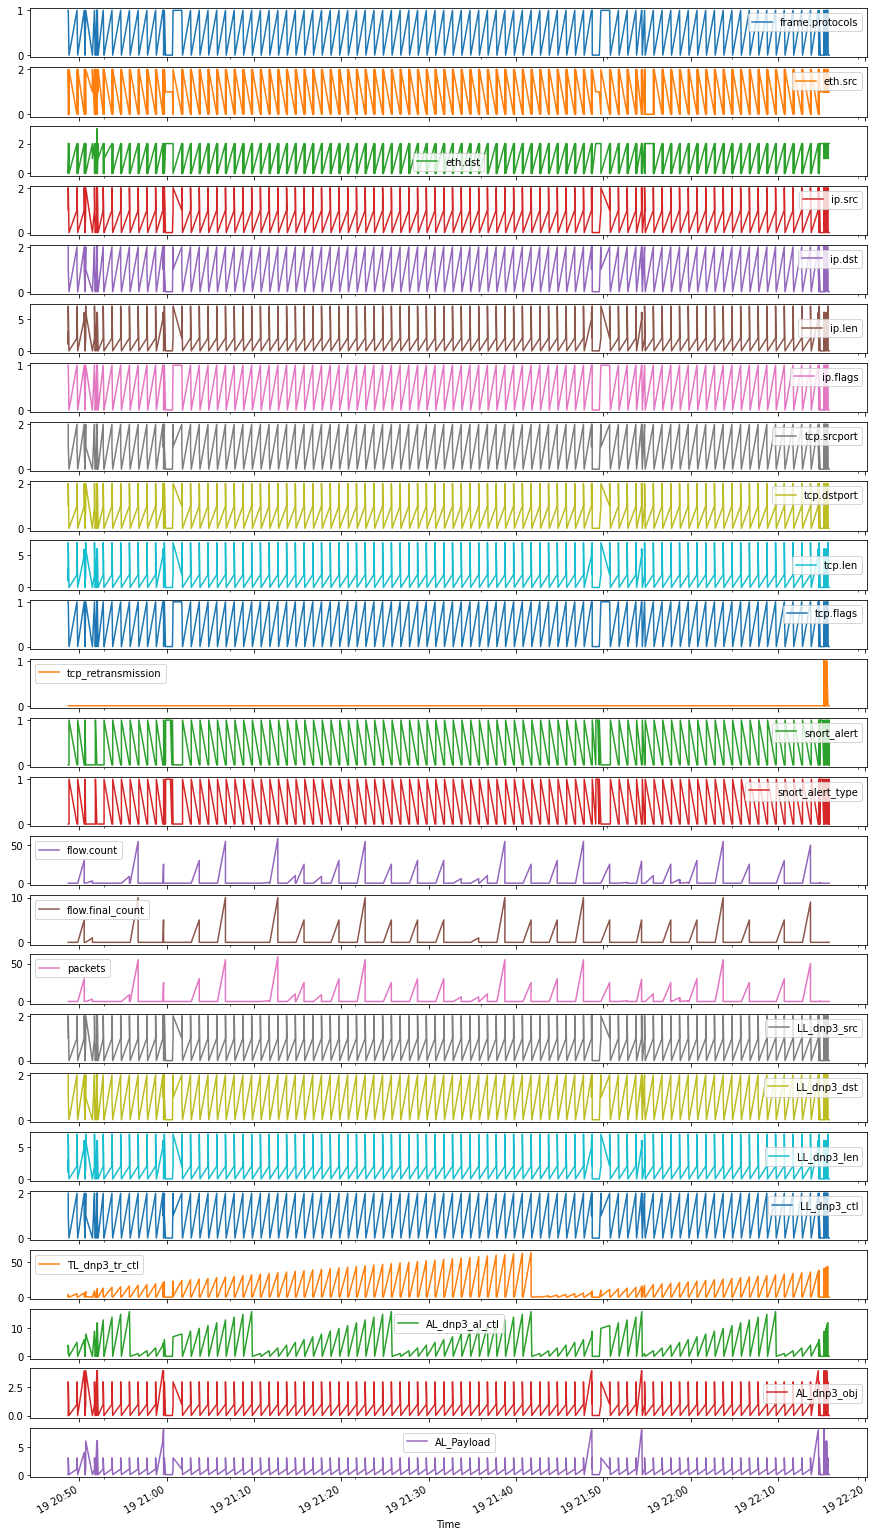

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# fusion.merged_table.plot(subplots=True,figsize=(15,30))
temp_table = fusion.merged_table
# temp_table.Time = temp_table.Time.dt.time
temp_table.set_index('Time').plot(subplots=True,figsize=(15,30))
plt.show() # takes about 10 seconds

**Step 13**: Dimension reduction (Inter feature correlation) to remove the trivial features using Principal component analysis (PCA)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [ ]:
# Drop the irrelvant columns and the snort-related columns
table1_less = fusion.merged_table.drop(columns=['Time', 'snort_alert', 'snort_alert_type'])

# Use PCA for dimension reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(table1_less.values)

pca_result = pca.transform(table1_less.values)
pca_table1 = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'f5','f6', 'f7', 'f8', 'f9', 'f10'])
for i in range(10):
    pca_table1[f'f{i+1}'] = pca_result[:,i]
pca.explained_variance_ratio_

array([6.76830469e-01, 1.68866259e-01, 1.05038657e-01, 2.07896303e-02,
       1.30541324e-02, 1.10499278e-02, 2.37130106e-03, 1.72149506e-03,
       1.82501608e-04, 5.41683851e-05])

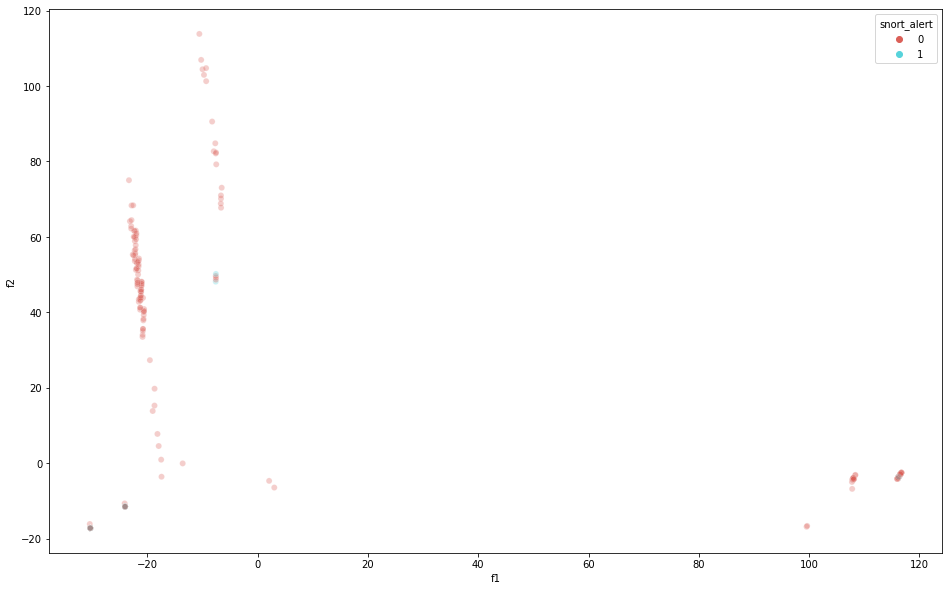

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,10))
pca_table1['snort_alert'] = fusion.merged_table['snort_alert']
pca_table1['snort_alert'] = pca_table1['snort_alert'].astype('str')
sns.scatterplot(x='f1', y='f2', hue='snort_alert', palette=sns.color_palette("hls",2), legend="full", data=pca_table1, alpha=0.3)

**Step 14**: Clustering using t-distributed Stochastic Neighbor Embedding

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 604 samples in 0.002s...
[t-SNE] Computed neighbors for 604 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 604 / 604
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.624680
[t-SNE] KL divergence after 1000 iterations: 0.225550


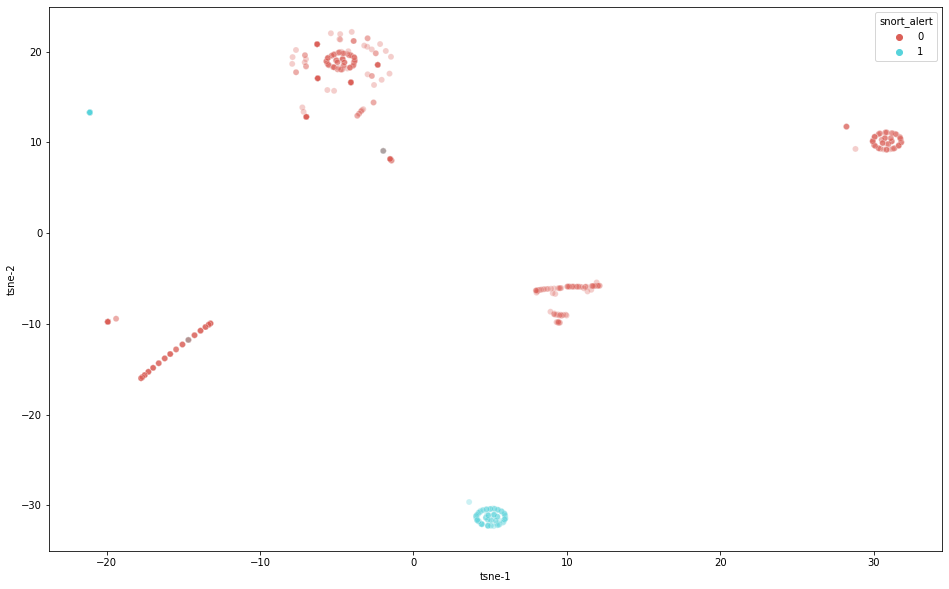

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1)
tsne_results = tsne.fit_transform(pca_table1)
pca_table1['tsne-1'] = tsne_results[:,0]
pca_table1['tsne-2'] = tsne_results[:,1]
pca_table1['Time'] = fusion.merged_table['Time']
plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-1', y='tsne-2', hue='snort_alert', palette=sns.color_palette("hls",2), legend="full", data=pca_table1, alpha=0.3)

In [ ]:
# We can even use interactive plot to analyze the events in detail
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=pca_table1['tsne-1'], y=pca_table1['tsne-2'], mode='markers',marker_color=pca_table1['snort_alert'].astype('int'),text=pca_table1['Time']))
fig.show()

**Step 15**: We have a different function now for all the steps we followed till now, and perform the fusion for all the different locations.

In [ ]:
from multi_stage_fusion import multi_stage_fusion
#router_dnp3_arp_feb19_s2.pickle
#json_file='feb18_dnp3_outstation_mitm_dos.json', raw_pcap_pickle='os_dnp3_arp.pickle',snort_log="snort_log_feb18.log", es_ip='10.110.215.30'
table1 = fusion.merged_table
table2 = multi_stage_fusion(json_file='BackUpData/feb19_dnp3_router_sample2.json', raw_pcap_pickle='BackUpData/router_dnp3_arp_feb19_s2.pickle',
                       snort_log="BackUpData/snort_router4_feb19_2.log", es_ip='10.110.215.30', duration="2020-02-19:2020-02-20")

NameError: ignored

**Step 16**: Now merge all the table from different locations

In [ ]:
table3 = multi_stage_fusion(json_file='feb19_dnp3_master_sample2.json', raw_pcap_pickle='master_dnp3_arp_feb19_s2.pickle',
                       snort_log="snort_router4_feb19_2.log", es_ip='10.110.215.30', duration="2020-02-20:2020-02-21")
fusion_all = DataFusion()
merged_all = fusion_all.merge_by_time([table1, table2, table3], ['outstation', 'router', 'master'])
merged_all

In [ ]:
ax = plt.figure(figsize=(16,4))
plt.plot(merged_all['Time'], merged_all['location'], marker='|', lw=0, ms=10)
plt.show()